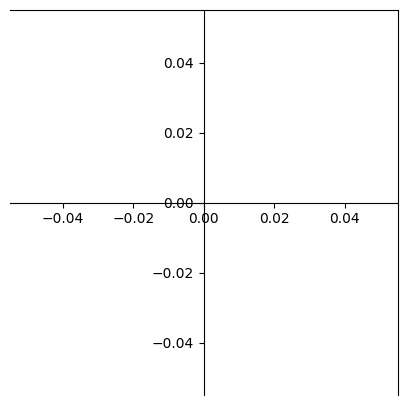

In [4]:
import matplotlib.pyplot as plt

# 这里建立的画布大小是5*5的，并不是坐标轴范围，使用“十字按钮”拖动你就懂了！
plt.figure(figsize = (5,5))
plt.plot()  # 画个只有坐标系的图（因为没有传参数，所以显示空白）

ax = plt.gca()

# 获取你想要挪动的坐标轴，这里只有顶部、底部、左、右四个方向参数
ax.xaxis.set_ticks_position('bottom')  #  要挪动底部的X轴，所以先目光锁定底部！

# 在这里，position位置参数有三种，这里用到了“按Y轴刻度位置挪动”
# 'data'表示按数值挪动，其后数字代表挪动到Y轴的刻度值
ax.spines['bottom'].set_position(('data',0))
# 同理，要挪动Y轴的代码如下
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()
# 补充：set_position( )中除了‘data’以外还有‘outward’和‘axes’，自己去尝试效果

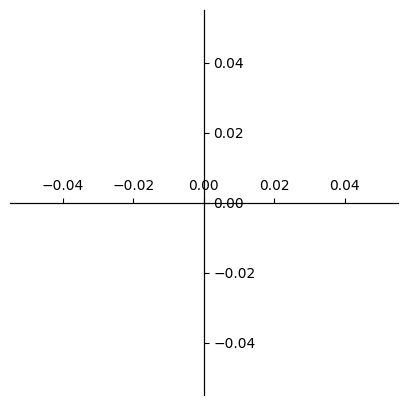

In [5]:
# 方法一：按照前面讲的，将处于右边和上面的“支柱”也挪到（0,0）位置
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.plot()

ax = plt.gca()

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.xaxis.set_ticks_position('top')
ax.spines['top'].set_position(('data',0))

ax.yaxis.set_ticks_position('right')
ax.spines['right'].set_position(('data',0))

plt.show()

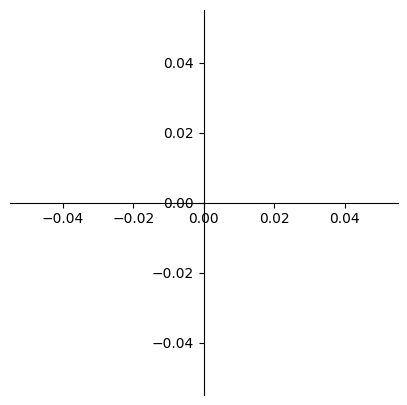

In [15]:
# 方法二：强行给这两个“支柱”涂上隐形涂料（获取其颜色并设置为none）
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.plot()

ax = plt.gca()

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.spines['top'].set_color('none')  # 设置顶部支柱的颜色为空

ax.spines['right'].set_color('none')  # 设置右边支柱的颜色为空

plt.show()

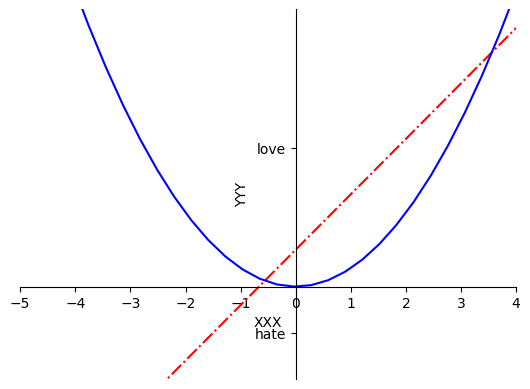

In [16]:
import matplotlib.pyplot as plt
import numpy as np

n = np.linspace(-5, 4, 30)
m1 = 3 * n + 2
m2 = n ** 2

plt.plot(n, m1, 'r-.', n, m2, 'b')

plt.xlim((-2, 4))
plt.ylim((-5, 15))

x_ticks = np.linspace(-5, 4, 10)
plt.xticks(x_ticks)

plt.yticks([-2.5, 7.5], ['hate','love'])

plt.xlabel('XXX')
plt.ylabel('YYY')

ax = plt.gca()

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show()

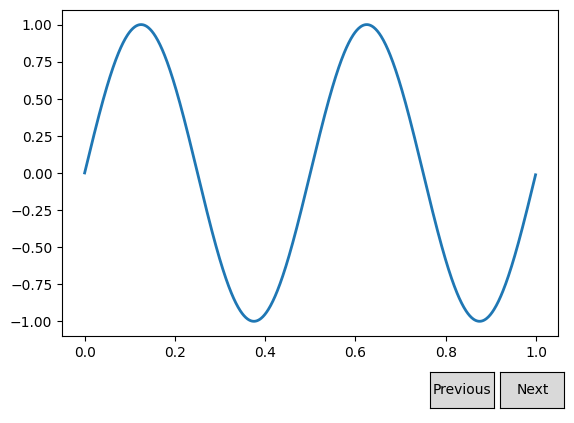

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = ax.plot(t, s, lw=2)


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

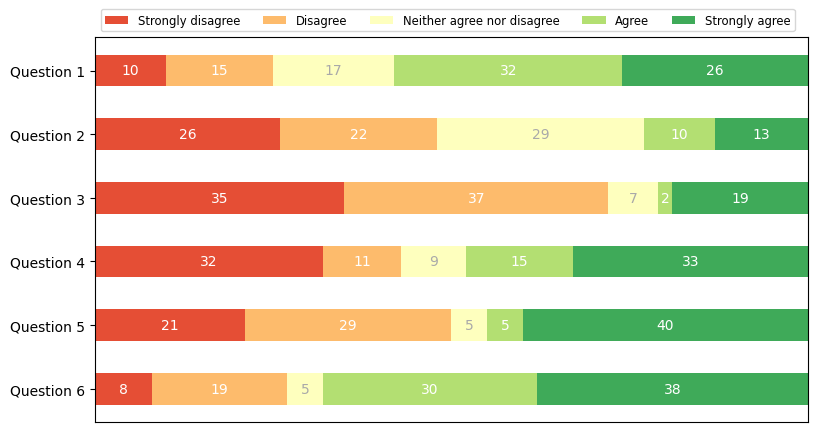

In [18]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

[(-1.0, 5.0), (-3.0, 5.0)]

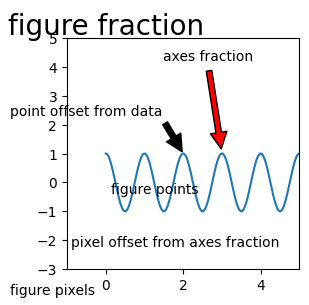

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom

# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')
ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')
ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

# The following examples show off how these arrows are drawn.

ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('axes fraction',
            xy=(3, 1), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# You may also use negative points or pixels to specify from (right, top).
# E.g., (-10, 10) is 10 points to the left of the right side of the axes and 10
# points above the bottom

ax.annotate('pixel offset from axes fraction',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax.set(xlim=(-1, 5), ylim=(-3, 5))

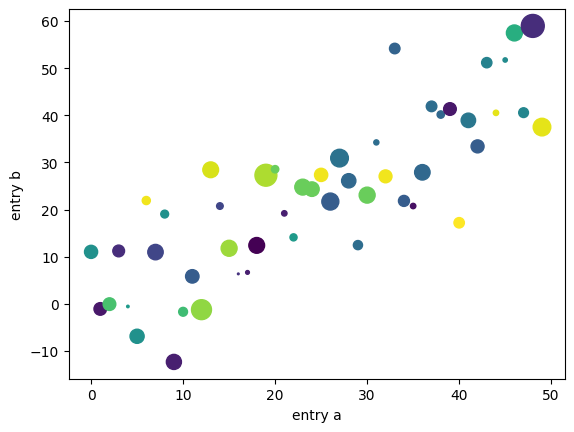

In [23]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()